Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [11]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------- ------------- 194.6/294.9 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
titanic_df = pd.read_csv('train.csv')

In [6]:
titanic_df.info()

titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

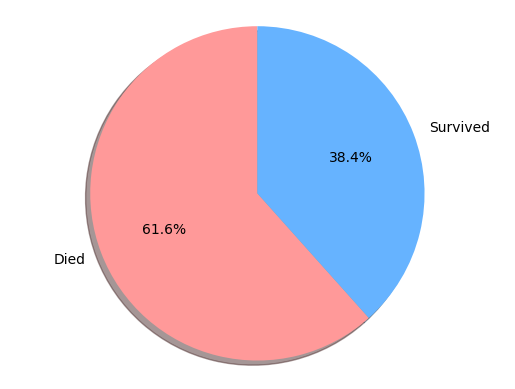

In [9]:
survival_counts = titanic_df['Survived'].value_counts()

labels = ['Died', 'Survived']
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  

plt.show()

Можна бачити, що загинуло 61,6% (позначено червоним), а вижило 38,4% (позначено синім).

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


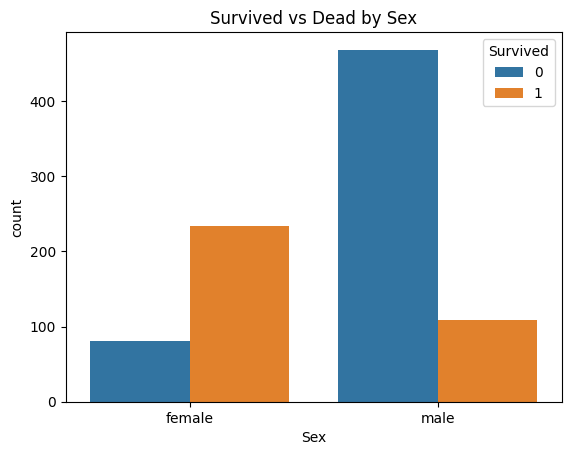

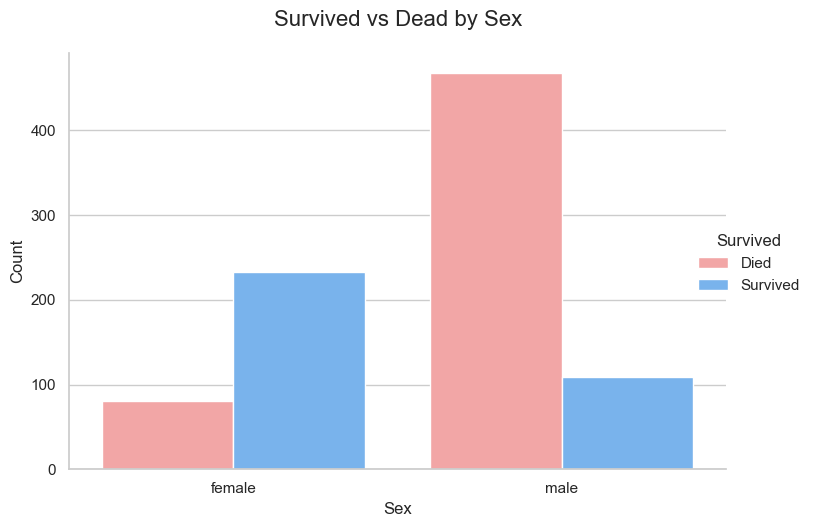

In [12]:
survival_by_sex = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()

sns.set_theme(style="whitegrid")
bar_chart = sns.catplot(
    data=survival_by_sex, 
    x='Sex', 
    y='size', 
    hue='Survived', 
    kind='bar', 
    height=5, 
    aspect=1.5,
    palette=['#ff9999','#66b3ff'] 
)

bar_chart.set_axis_labels("Sex", "Count")
bar_chart._legend.set_title('Survived')
new_labels = ['Died', 'Survived']
for t, l in zip(bar_chart._legend.texts, new_labels):
    t.set_text(l)
bar_chart.figure.suptitle('Survived vs Dead by Sex', fontsize=16, y=1.05)

plt.show()

Зліва бачимо кількість загиблих (рожева) та виживших (синя) серед жінок, справа - серед чоловіків. Загальна кількість чоловіків у вибірці більша, тим не менш смертність серед них диспропорційно більша. Це пояснюється пріоритетністю розподілу місць на рятувальних суднах, де перевага надавалася жінкам та дітям.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

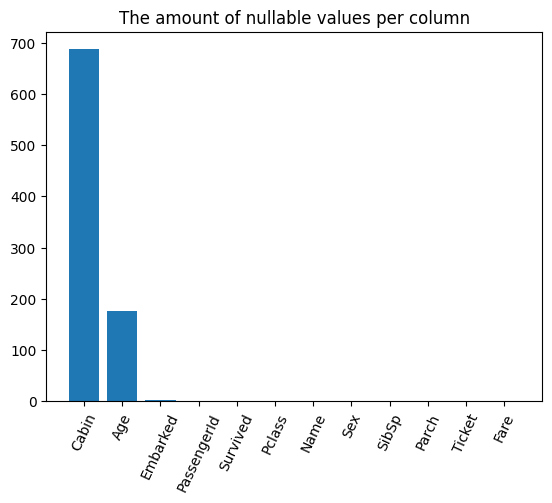

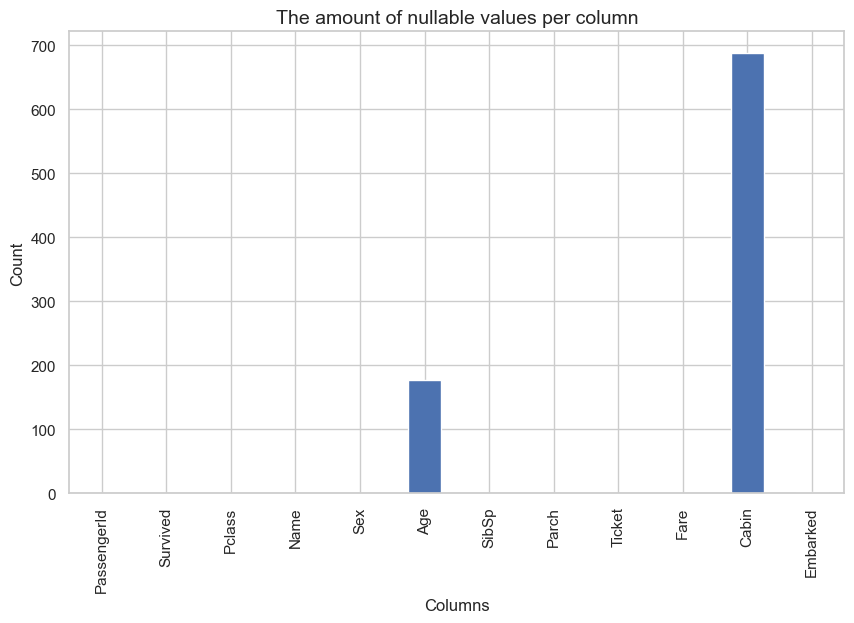

In [13]:
missing_values = titanic_df.isnull().sum()

fig, ax = plt.subplots(figsize=(10, 6))
missing_values.plot(kind='bar', ax=ax)

ax.set_title('The amount of nullable values per column', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Columns', fontsize=12)

plt.show()

Найбільша відсутність даних в колонці 'Cabin' (понад 600), можна зробити висновок що ця інформація не збиралась або була втрачена. Друга за кількістю колонка 'Age' (майже 200).

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

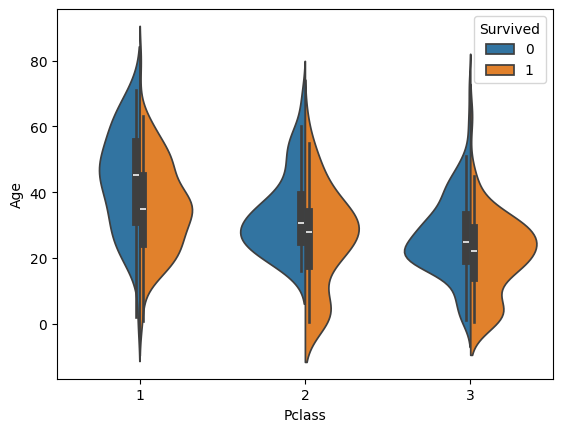

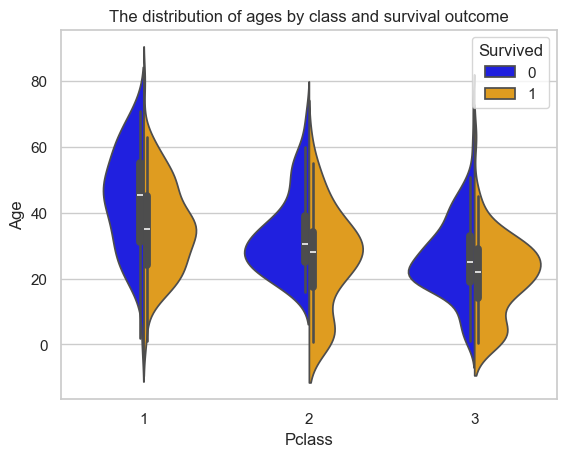

In [14]:
sns.set_style("whitegrid")

violin_plot = sns.violinplot(
    data=titanic_df,
    x='Pclass',
    y='Age',
    hue='Survived',
    split=True, 
    palette={0: "blue", 1: "orange"}
)

plt.title('The distribution of ages by class and survival outcome')

plt.legend(title='Survived', loc='best')

plt.show()

Це скрипковий графік, який порівнює розподіл віку пасажирів, сегментований за класом пасажира (Pclass) і результатом виживання (Survived). Кожна скрипка представляє віковий розподіл для даного класу, синій колір представляє пасажирів, які не вижили, а помаранчевий — тих, хто вижив.

Пасажири класу 1: мали ширший віковий діапазон серед тих, хто вижив, з піком розподілу для пасажирів приблизно 30-40 років. У цьому класі не вижило менше пасажирів молодшого віку.

Пасажири класу 2: Віковий розподіл тих, хто вижив, досить рівномірний, з невеликим піком близько 30 років. Пасажири, які не вижили, як правило, в середньому молодші, ніж пасажири класу 1.

Пасажири класу 3: у цьому класі були наймолодші пасажири загалом, і віковий розподіл тих, хто не вижив, значно молодший, ніж у тих, хто вижив.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


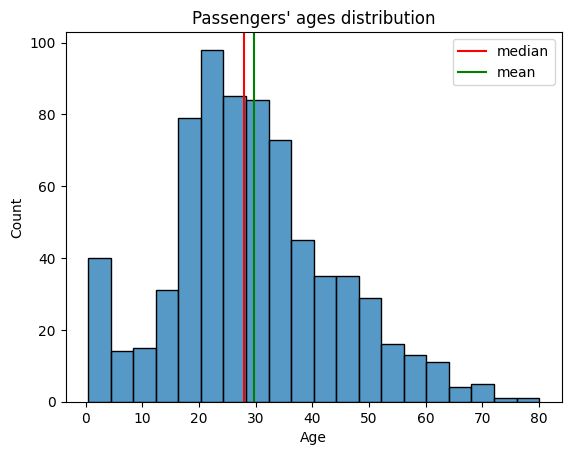

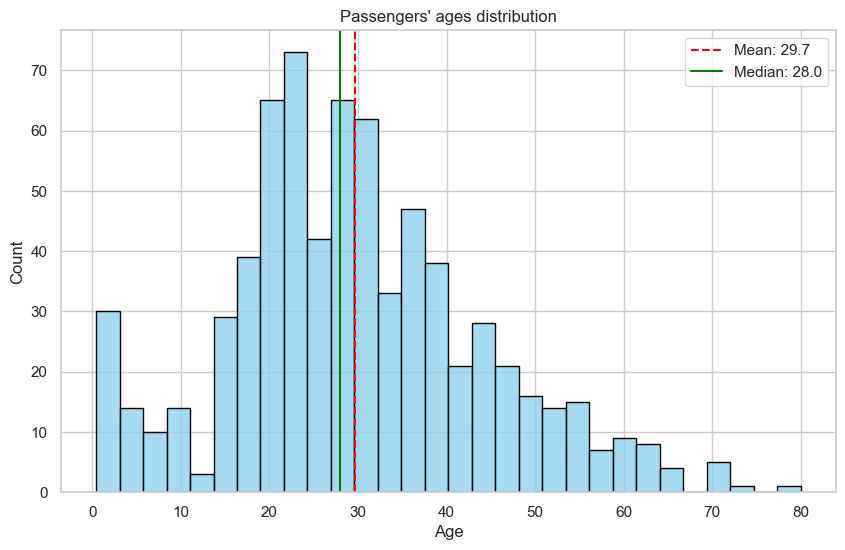

In [15]:
age_data = titanic_df['Age'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=30, color='skyblue', edgecolor='black')

mean_age = age_data.mean()
median_age = age_data.median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age:.1f}')

plt.title('Passengers\' ages distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend()

Графік є гістограмою, що показує розподіл віку серед пасажирів Титаніка. На осі x відкладено вік, а на осі у – кількість пасажирів у кожному віковому діапазоні. Дві вертикальні вказують середній і медіанний вік:

Середній вік (пунктирна червона лінія): приблизно 29,7 років. Це вказує на середній вік усіх пасажирів на борту.

Середній вік (зелена лінія): приблизно 28,0 років. Це значення означає, що половина пасажирів були молодшими за 28 років, а половина – старшими.

З гістограми можна зробити висновок:

Більшість пасажирів були молодими людьми: найвища смужка припадає на вік приблизно 20-30 років, що свідчить про те, що більшість пасажирів були молодими людьми.

Асиметрія: віковий розподіл дещо зміщений вправо, на що вказує довший хвіст у правій частині гістограми, тобто літніх пасажирів було відносно менше.

Діти: на борту була значна кількість дітей, про що вказують смужки в крайньому лівому куті гістограми.

Пасажири похилого віку: небагато пасажирів були старші 60 років, як показано на нижніх смугах з правого боку.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як соціально-економічний статус, виходячи з класу пасажира та вартості проїзду, співвідноситься з рівнем виживання на Титаніку?

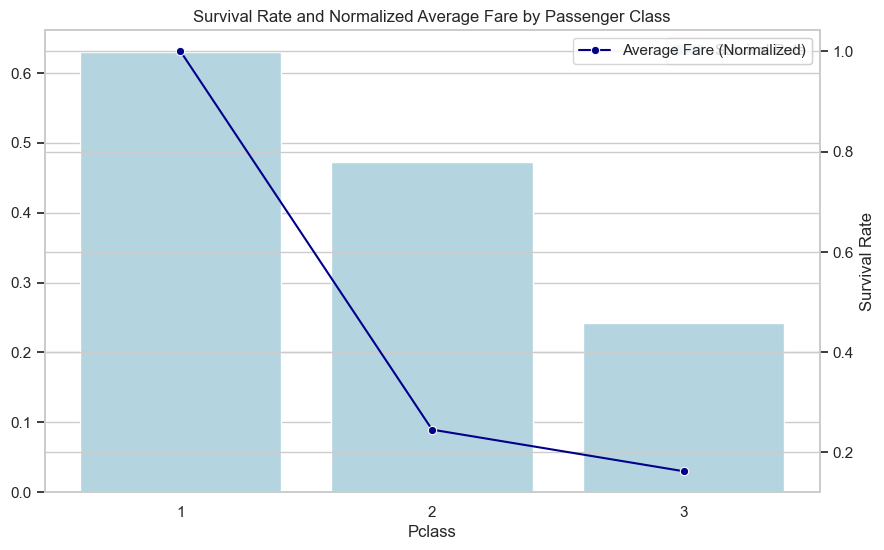

In [21]:
survival_rate_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
average_fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()

fare_max = average_fare_by_class.max()
average_fare_normalized = average_fare_by_class / fare_max

plt.figure(figsize=(10, 6))

sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, color='lightblue', label='Survival Rate')

ax2 = plt.twinx()
sns.lineplot(x=average_fare_normalized.index-1, y=average_fare_normalized.values, marker='o', color='darkblue', label='Average Fare (Normalized)')

plt.title('Survival Rate and Normalized Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Отримана візуалізація показує кореляцію між соціально-економічним статусом і виживанням. Клас 1 мав вищий відсоток виживання та також платив значно вищі тарифи, заможніші пасажири мали кращий доступ до ресурсів безпеки. Рівні виживання (Survival Rate) спадають разом з середньою вартістю квитка (Avarege Fare) покласово.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

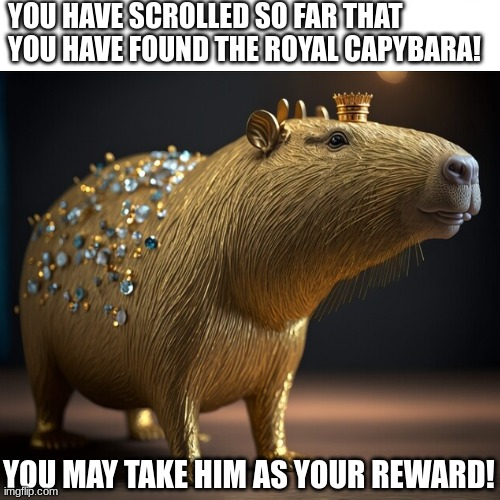